V spodnji tabeli so zajeti vsi podatki, ki smo se jih odločili analizirati.

In [1]:
import pandas as pd

RECEPTI = pd.read_csv('recepti.csv')
RECEPTI

,Ime,Kategorija,Težavnost,Čas (min),Hranilna vrednost (kcal/100g),Koraki,Sestavine,Opis,Dolžina opisa (besede),Dolžina opisa (črke)
0,Slivovi cmoki iz skutnega testa,Slovenska,2,60,332,4,8,S slivami nadevani cmočki iz rahlega skutnega ...,23,127
1,Pirina solata z zelenjavo in mocarelo,Brez mesa,1,40,118,4,13,"Lahka in barvita jed, ki ne vsebuje mesa in je...",33,163
2,Turška umešana jajca z zelenjavo (menemen),Jajčne jedi,1,30,62,5,8,Menemen je nekakšna turška različica sataraša....,60,321
3,Paprike z mletim mesom in rižem iz ene ponve,Glavne jedi,1,45,131,6,13,"Ko ne boste imeli časa ali volje, da bi se lot...",33,162
4,Pikantne polnjene paprike s tuno in kaprami,Domači pripravki,1,75,84,9,11,"Poletje se počasi končuje, z njim pa je poveza...",72,375
...,...,...,...,...,...,...,...,...,...,...
6587,Čulbastija,Balkanska,1,45,218,2,5,V originalnem receptu zrezke pripravimo iz svi...,31,166
6588,Sadna solata,Poletje,1,20,50,4,5,"Enostavna solata, polna živahnih barv in bogat...",27,131
6589,Brancin iz pečice,Ribe in morski sadeži,2,80,88,7,10,"Najbolj priljubljena slovenska riba, pripravlj...",27,162
6590,Žepki s čemažem in kozjo skuto,Vegetarijanstvo,2,50,200,4,8,V žepkih s čemažem sta dve sestavini polni zdr...,80,413


Oglejmo si, katerih 10 kategorij je pri receptih najbolj pogostih in koliko receptov vsebuje vsaka.

In [2]:
po_kategorijah = RECEPTI.groupby(by= 'Kategorija').size()
po_kategorijah.sort_values(ascending=False, inplace=True)
po_kategorijah.head(10)

Kategorija
Zabava             604
Sladice            549
Slovenska          541
MasterChef         457
Zdravo in vegi     348
Italijanska        327
Poletje            306
Meso               275
Jesen              226
Vegetarijanstvo    214
dtype: int64

Poglejmo si, kakšno je razmerje med recepti posameznih težavnosti.

<Axes: >

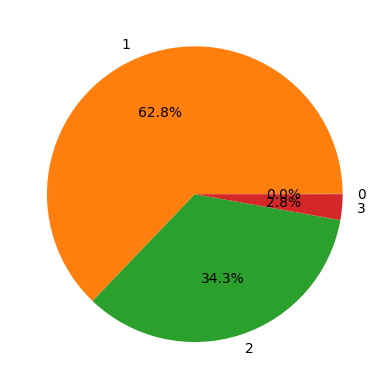

In [3]:
RECEPTI.groupby(by= 'Težavnost').size().plot.pie(autopct='%1.1f%%')

Očitno na portalu prevladujejo enostavni recepti, zato korelacij med recepti glede na njihovo težavnost nismo iskali.

Spodnji diagram prikazuje, koliko receptov vsebuje določeno število sestavin.

<Axes: xlabel='Sestavine', ylabel='Št. receptov'>

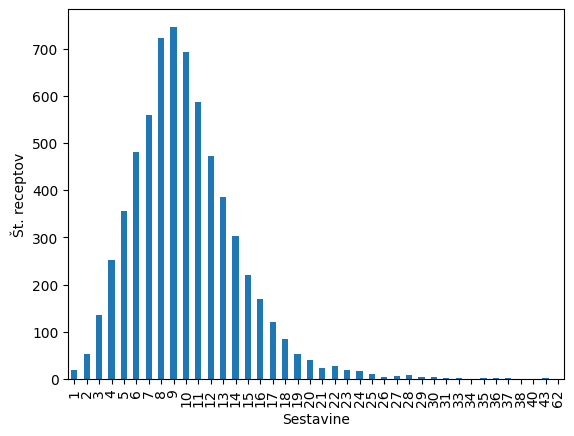

In [4]:
po_sestavinah = RECEPTI.groupby(by= 'Sestavine').size()
po_sestavinah.plot.bar(ylabel= 'Št. receptov')

Oglejmo si, koliko časa traja priprava receptov.
V tortnem diagramu so časi združeni v 15-minutnih kategorijah, kjer spodnja meja ni vključena, zgornja pa je.

<Axes: >

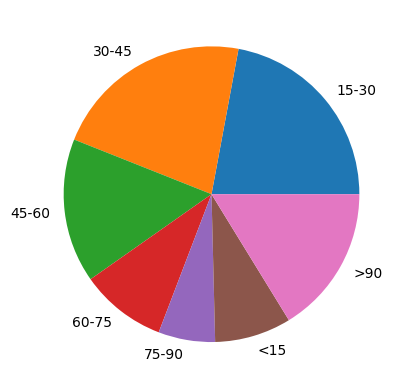

In [5]:
from pomozne_funkcije import zdruzi_po_casu

RECEPTI['Časovni intervali (min)'] = RECEPTI['Čas (min)'].map(zdruzi_po_casu)
RECEPTI.groupby(by= 'Časovni intervali (min)').size().plot.pie()


Zanima nas, ali je med časom priprave in števlom sestavin kakšna povezava. To prikazuje spodnji diagram.

<Axes: xlabel='Sestavine', ylabel='Čas (min)'>

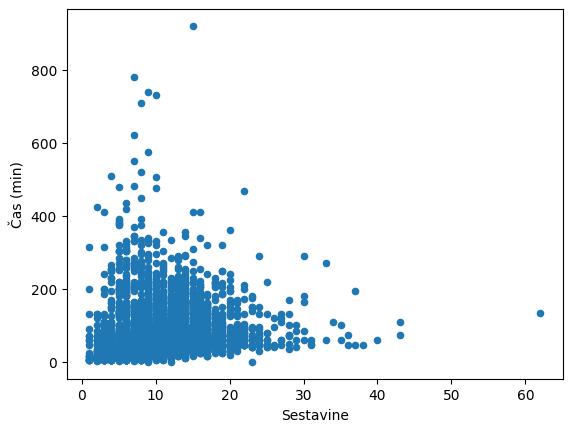

In [6]:
RECEPTI.plot.scatter('Sestavine', 'Čas (min)')

Opazimo, da nekaj receptov na grafu izstopa po številu sestavin. Poglejmo si, kateri so to.

In [7]:
RECEPTI.sort_values(by= 'Sestavine', ascending=False, inplace=True)
RECEPTI.head(3)

,Ime,Kategorija,Težavnost,Čas (min),Hranilna vrednost (kcal/100g),Koraki,Sestavine,Opis,Dolžina opisa (besede),Dolžina opisa (črke),Časovni intervali (min)
1062,Telečja pečenka z devetimi prilogami,MasterChef,2,135,127,14,62,"Telečja pečenka s praženim krompirjem, koromač...",57,346,>90
1548,"Sadna torta s pehtranovim biskvitom, stepeno s...",MasterChef,3,110,281,9,43,V čast 25. obletnice Karimove poroke so morali...,42,260,>90
2049,"Srnin file s teranovo omako, špinačni raviol s...",MasterChef,3,75,179,8,43,V finalnem dvoboju tretje sezone kuharskega te...,43,242,60-75


Poglejmo si še recepte, ki izstopajo po času priprave.

In [8]:
RECEPTI.sort_values(by= 'Čas (min)', ascending=False, inplace=True)
RECEPTI.head(3)

,Ime,Kategorija,Težavnost,Čas (min),Hranilna vrednost (kcal/100g),Koraki,Sestavine,Opis,Dolžina opisa (besede),Dolžina opisa (črke),Časovni intervali (min)
4426,Božično sadje z oreščki,Zima,1,920,264,4,15,"Zmes sadja, oreščkov, začimb in alkohola shran...",47,217,>90
4482,Domači marshmallowsi,Zabava,2,780,382,5,7,Marshmallow oziroma slez je rastlina iz katere...,68,369,>90
6038,Paška z breskvami in ingverjem,Velika noč,3,740,109,4,9,Tradicionalna paška je precej kalorična jed; v...,33,174,>90


Spodnji graf prikazuje hranilno vrednost posameznih receptov.

<Axes: xlabel='Hranilna vrednost (kcal/100g)', ylabel='Št. receptov'>

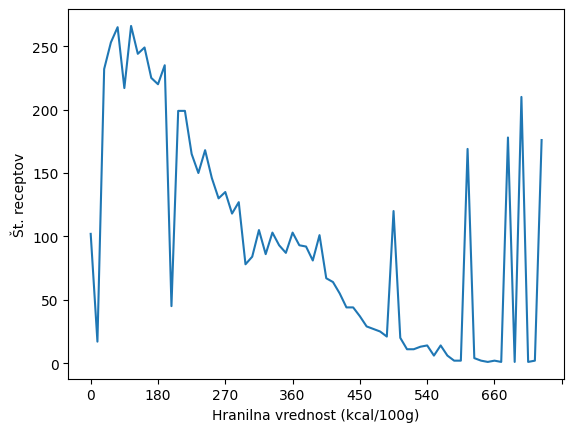

In [9]:
from pomozne_funkcije import zdruzi_po_kcal

RECEPTI['Hranilna vrednost intervali'] = RECEPTI['Hranilna vrednost (kcal/100g)'].map(zdruzi_po_kcal)
po_hranilni_vrednosti = RECEPTI.groupby(by= 'Hranilna vrednost intervali').size()
po_hranilni_vrednosti.plot.line(xlabel= 'Hranilna vrednost (kcal/100g)', ylabel= 'Št. receptov')

Opazimo, da imajo nekateri recepti hranilno vrednost 0 kcal. Oglejmo si jih.

In [10]:
brez_kcal = RECEPTI['Hranilna vrednost (kcal/100g)'].apply(lambda x: x == 0)
tabela_brez_kcal = RECEPTI[brez_kcal]
tabela_brez_kcal[['Ime', 'Kategorija', 'Opis']]

,Ime,Kategorija,Opis
5091,Suhi mandarinini olupki,Slovenska,S suhimi mandarininimi olupki boste lahko pope...
3679,Domač grški jogurt,Zdravo in vegi,Čeprav so grški jogurt prvotno izdelovali iz o...
5642,Karamelni sladoled,Slovenska,"Preprost domač sladoled s karamelo, ki ga lahk..."
2786,Bananin sladoled,Banana na 1001 način,Za pripravo ne potrebujete strojčka za sladole...
5314,Meringue,Zabava,Majhni puhasti piškotki z mehko sredico in hru...
...,...,...,...
2995,Amorjeva puščica,Valentinovo,Uporabite preverjeno formulo in svojega srčneg...
5399,Rikota z drobnjakom,Zabava,So vas nenapovedani gostje presenetili z obisk...
5224,Napitek z jabolčnim kisom,Zdravo in vegi,Čas je za čiščenje telesa. Napitek iz jabolčne...
5919,Toast z arašidovim maslom in banano,Priložnostno,Okusen zajtrk vas bo napolnil s svežo energijo.


Ugotovimo, da gre verjetno le za recepte, kjer uporabniki hranilne vrednosti niso zapisali in ne za nekalorične recepte.

Zanimalo nas je tudi, kako dolge opise receptov pišejo uporabniki spletnega portala. Oglejmo si najprej, ali se dolžini opisa glede na število besed in črk razlikujeta.

<Axes: xlabel='Dolžina opisa (besede)', ylabel='Dolžina opisa (črke)'>

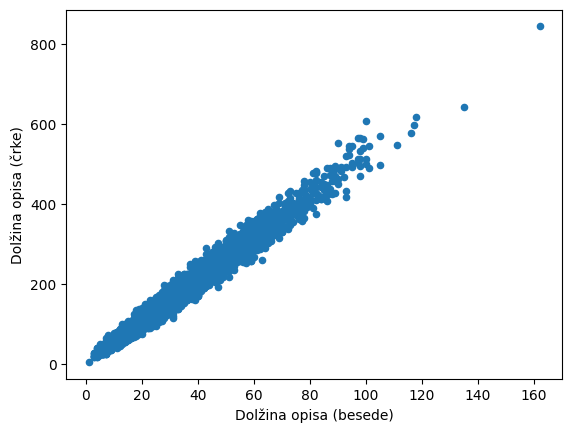

In [11]:
RECEPTI.plot.scatter('Dolžina opisa (besede)', 'Dolžina opisa (črke)')

Kot pričakovano posebnih odstopanj ni. Zanimalo pa nas je tudi, ali so uporabniki, ki so pisali najdaljše opise, tudi recept razdelili na največ korakov.

<Axes: xlabel='Dolžina opisa (besede)', ylabel='Koraki'>

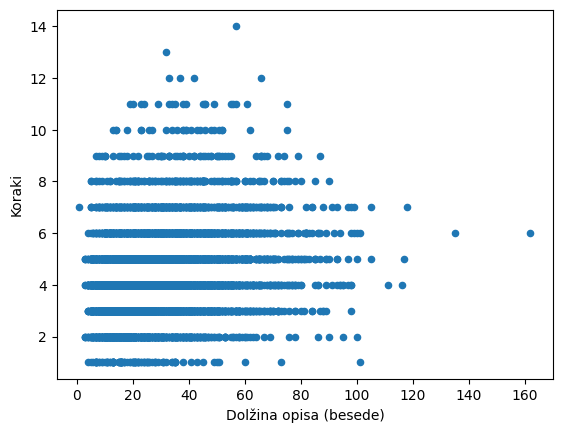

In [12]:
RECEPTI.plot.scatter('Dolžina opisa (besede)', 'Koraki')

Kljub našim ugibanjem očitne koralacije ni bilo.

Za konec si oglejmo, pri katerih receptih so se uporabniki pri pisanju opisov najbolj razgovorili ...

In [13]:
RECEPTI.sort_values(by= 'Dolžina opisa (besede)', ascending=False, inplace=True)
tabela = RECEPTI[['Ime', 'Opis', 'Dolžina opisa (besede)']]
tabela.head(10)

,Ime,Opis,Dolžina opisa (besede)
2069,Veganska potica z rožičem,Potica je gotovo najbolj znana in najbolj razš...,162
1320,Orehova potica z drožmi,V knjigi Potice iz Slovnije prof. dr. Janez Bo...,135
509,Pica polžki iz kvašenega testa,Pico imamo vsi radi že zaradi neštetih možnost...,118
1673,Veganski bananini krofi,Veganski bananini krofi s čokoladnim oblivom s...,117
1100,Francoski topli sendvič croque monsieur,"Legenda pravi, da je sendvič nastal tako, da j...",116
1677,Testenine z zeleno omako,"Super zelene testenine, ki so na jedilniku sko...",111
94,Babičino pecivo s sadjem,Naše mame in babice so bile v kuhnji prave moj...,105
363,Belgijski vaflji,"Vaflji so odlična izbira za tiste dni, ko se ž...",105
1947,Okusen smoothie iz rdeče pese,Smoothiji postajajo nepogrešljiv del marsikate...,101
53,Vložena zelenjava,"Obilje vrtnih pridelkov nas prav sili, da del ...",101


... in pri katerih najmanj.

In [14]:
tabela.tail(10)

,Ime,Opis,Dolžina opisa (besede)
5179,Mangov sladoled,Eksotika iz domačega zamrzovalnika!,4
4331,Krompir z nadevom iz mletega mesa,Enostavno in okusno!,3
4965,Limonini mafini,Igračkanje. Otročje lahko!,3
5133,Malinova marmelada brez sladkorja,"Mmmmm, slastne maline!",3
5089,Kuhane artičoke,Afrodiziak romantičnega okusa!,3
4387,Gratinirane skutne palačinke,Nasitne in imenitne!,3
2115,Ribji fileji v hrustljavi srajčki,Zdrava 'pohana' ribica.,3
4376,Lososova nabodala z jogurtovo omako,Za ljubitelje lososa!,3
4943,Kostanjeva juha,Neverjetno okusna kombinacija!,3
2447,"Steak s pikantno omako, zelenjavno in sadno pr...",aaaa,1
